# 前言

我们都很害怕生病，但感冒发烧这种从小到大的疾病我们已经麻木了，因为一星期他就会好，但是随着长大，各种发炎、三高、心脏病、冠心病响应而生。

心脏病作为一种发作起来让人看了就觉得恐怖的疾病，每年不知道夺走多少生命。而那些患病健在的人们也必须在自己后续的生命里割舍太多东西，以防止心脏病发作。

没有得病的时候，我们永远觉得它离自己很远。我对心脏病的认知就是这样，我不知道它患病的原因，也不知哪些原因会引起心脏病。而患病后如何保持正常生活等等，一概不知。

今天在kaggle上看到一个心脏病数据，那么借此深入分析一下。

# 分析步骤
## 导入library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


sns.set(style='ticks')
plt.rcParams['font.family']='Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')

## 读取数据集

In [2]:
data=pd.read_csv('../input/heart-disease-uci/heart.csv')  #读取数据
print('行:',data.shape[0],',  列:',data.shape[1]) # 看多少行多少列
data.head(5)

行: 303 ,  列: 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


通过前五行的展示可以看到这个关于心脏病的数据集有14列，那么这几列都什么意思呢？


- age: 该朋友的年龄
- sex: 该朋友的性别 (1 = 男性, 0 = 女性)
- cp: 经历过的胸痛类型（值1：典型心绞痛，值2：非典型性心绞痛，值3：非心绞痛，值0：无症状）
- trestbps: 该朋友的静息血压（入院时的毫米汞柱）
- chol: 该朋友的胆固醇测量值，单位 ： mg/dl
- fbs: 人的空腹血糖（> 120 mg/dl，1=真； 0=假）
- restecg: 静息心电图测量（0=正常，1=患有ST-T波异常，2=根据Estes的标准显示可能或确定的左心室肥大）
- thalach: 这朋友达到的最大心率
- exang: 运动引起的心绞痛（1=有过； 0=没有）
- oldpeak: ST抑制，由运动引起的相对于休息引起的（“ ST”与ECG图上的位置有关。[这块比较专业，可以点这个看一个解读](https://litfl.com/st-segment-ecg-library/)）
- slope: 最高运动ST段的斜率（值1:上坡，值2:平坦，值3:下坡）
- ca: 萤光显色的主要血管数目（0-3）
- thal: 一种称为地中海贫血的血液疾病（3=正常； 6=固定缺陷； 7=可逆缺陷）
- target: 心脏病（0=否，1=是）

顺手送上一篇[知乎链接](https://zhuanlan.zhihu.com/p/40666359)
此外上边只是我通过原版数据集给的解读翻译的，如有出错误，欢迎纠正

## 数据解读
### 看一看这个数据集男女比例，患病比例 ，以及患病与性别关系

In [4]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
countfemale = len(data[data.sex == 0])
countmale = len(data[data.sex == 1])
print(f'没患病人数:{countNoDisease }',end=' ,')
print("没有得心脏病比率: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print(f'有患病人数:{countHaveDisease }',end=' ,')
print("患有心脏病比率: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))
print(f'女性人数:{countfemale }',end=' ,')
print("女性比例: {:.2f}%".format((countfemale / (len(data.sex))*100)))
print(f'男性人数:{countmale }',end=' ,')
print("男性比例: {:.2f}%".format((countmale   / (len(data.sex))*100)))

没患病人数:138 ,没有得心脏病比率: 45.54%
有患病人数:165 ,患有心脏病比率: 54.46%
女性人数:96 ,女性比例: 31.68%
男性人数:207 ,男性比例: 68.32%


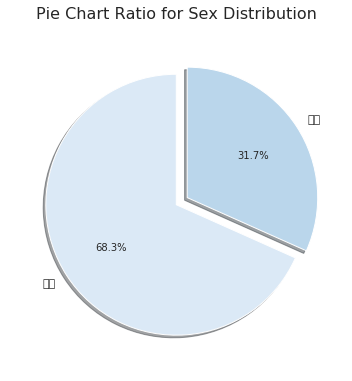

In [5]:
# 画个饼图
labels = '男子','女子'
sizes = [countmale,countfemale]

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=(0, 0.1), labels=labels, colors=sns.color_palette("Blues"),
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Pie Chart Ratio for Sex Distribution\n', fontsize=16)
sns.set_context("paper", font_scale=1.2)

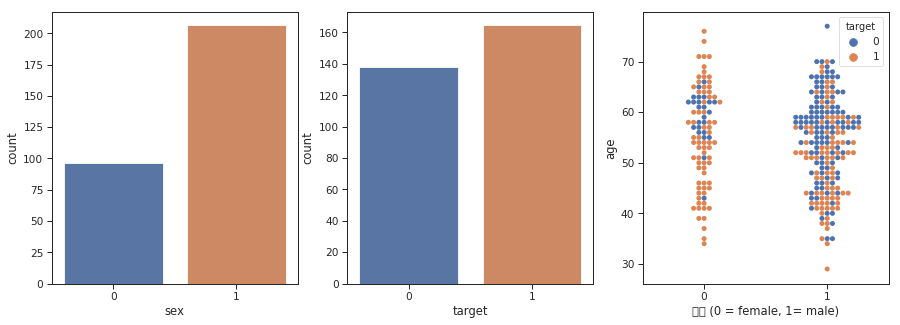

In [6]:
fig, ax =plt.subplots(1,3)  #2个子区域
fig.set_size_inches(w=15,h=5)   # 设置画布大小
sns.countplot(x="sex", data=data,ax=ax[0])
plt.xlabel("性别 (0 = female, 1= male)")
sns.countplot(x="target", data=data,ax=ax[1])
plt.xlabel("是否患病 (0 = 未患病, 1= 患病)")
sns.swarmplot(x='sex',y='age',hue='target',data=data,ax=ax[2])
plt.xlabel("性别 (0 = female, 1= male)")
plt.show()

In [7]:
group2 = data.groupby(['sex','target'])
group2.count()

age   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
sex target                                                                    
0   0        24   24        24    24   24       24       24     24       24   
    1        72   72        72    72   72       72       72     72       72   
1   0       114  114       114   114  114      114      114    114      114   
    1        93   93        93    93   93       93       93     93       93   

            slope   ca  thal  
sex target                    
0   0          24   24    24  
    1          72   72    72  
1   0         114  114   114  
    1          93   93    93

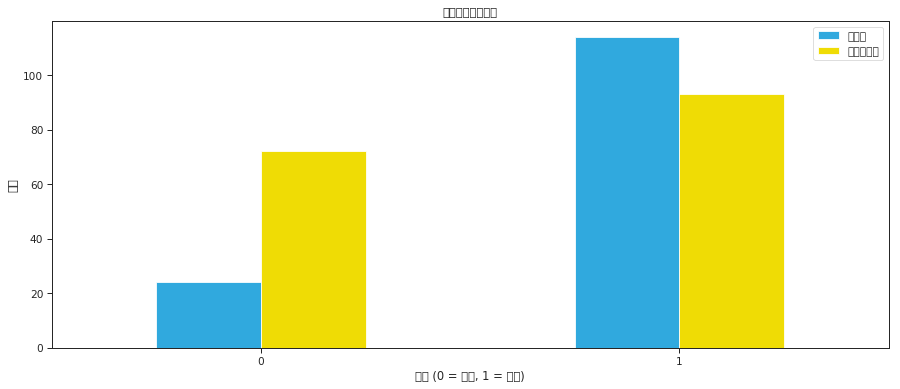

In [8]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#30A9DE','#EFDC05' ])
plt.title('各性别下患病图示')
plt.xlabel('性别 (0 = 女性, 1 = 男性)')
plt.xticks(rotation=0)
plt.legend(["未患病", "患有心脏病"])
plt.ylabel('人数')
plt.show()

在这个数据集中，男性多于女性一倍，分别207和96人；患病患者稍微多余未患病患者，患病165，138人。
因为年龄可能是连续的，因此在第三幅图做年龄、性别、患病关系图，单从颜色观察可发现在这个数据集中，女性患病率大于男性。通过统计可以计算得到，男性患病率44.9% ，女性患病率75%。（这个患病率只是这个数据集的）

## 和年龄相关的分析

### 患病年龄分布

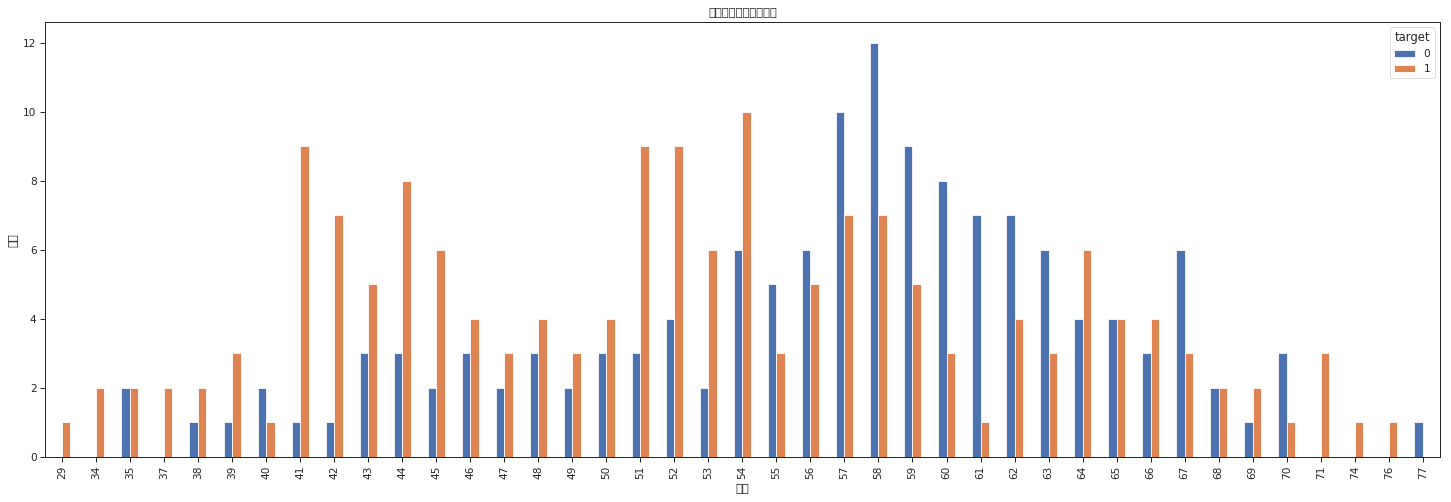

In [9]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8))
plt.title('患病变化随年龄分布图')
plt.xlabel('岁数')
plt.ylabel('比率')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### 年龄-心率-患病三者关系

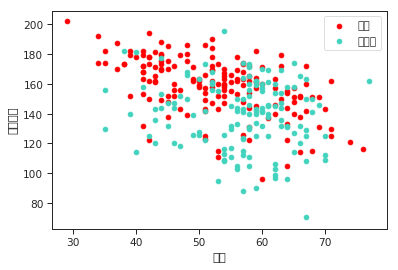

In [10]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c='#41D3BD')
plt.legend(["患病", "未患病"])
plt.xlabel("年龄")
plt.ylabel("最大心率")
plt.show()

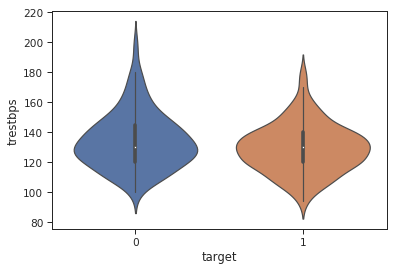

In [11]:
sns.violinplot(x=data.target,y=data.trestbps,data=data)

看到30岁心跳200那个点，吓我一跳，如果心脏病不是病，那200这个速度太让人膜拜了.可以看到的是心跳速度患病的大概集中在140-190bpm之间。这个数据比未患病的人普遍高一些。具体数据还需要继续分析

### 年龄和血压（trestbps）分布关系

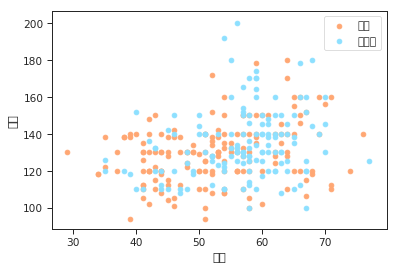

In [12]:
plt.scatter(x=data.age[data.target==1], y=data.trestbps[data.target==1], c="#FFA773")
plt.scatter(x=data.age[data.target==0], y=data.trestbps[data.target==0], c="#8DE0FF")
plt.legend(["患病",'未患病'])
plt.xlabel("年龄")
plt.ylabel("血压")
plt.show()

从这个结果可以看到的是，静息血压患病人和未患病的人在血压方面都是均匀分布的，随着年龄增长也没有明显的分层变化。所以并不能直接从静息血压很好的判断出是否患心脏病。

那么血压与其他什么有关呢？比如心率？好，来看看

### 血压和心率关系

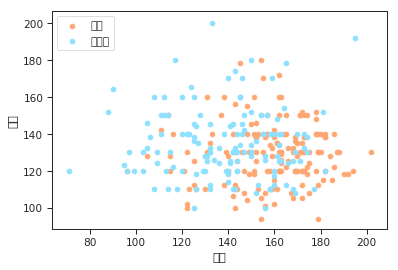

In [13]:
plt.scatter(x=data.thalach[data.target==1], y=data.trestbps[data.target==1], c="#FFA773")
plt.scatter(x=data.thalach[data.target==0], y=data.trestbps[data.target==0], c="#8DE0FF")
plt.legend(["患病",'未患病'])
plt.xlabel("心率")
plt.ylabel("血压")
plt.show()

上图可以看到是否患病和心率有一定的关系，比如未患病的心率普遍低一些，但血压分布来讲分布差异并不明显

### 年龄和胆固醇关系

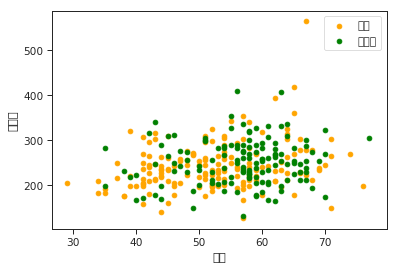

In [14]:
plt.scatter(x=data.age[data.target==1], y=data.chol[data.target==1], c="orange")
plt.scatter(x=data.age[data.target==0], y=data.chol[data.target==0], c="green")
plt.legend(["患病",'未患病'])
plt.xlabel("年龄")
plt.ylabel("胆固醇")
plt.show()

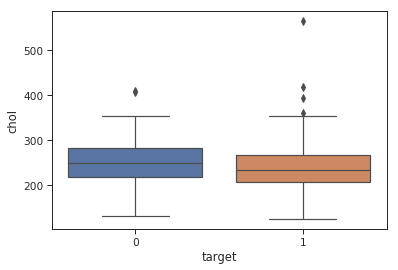

In [15]:
sns.boxplot(x=data.target,y=data.chol,data=data)

从散点图和箱型图可以看到的是，有没有心脏病和胆固醇相关性不是很高

## 心痛类型和心脏病关系

既然是病症，一定带着痛苦，或者一定跟痛苦相关。下面来看一下胸痛类型和心脏病的关系

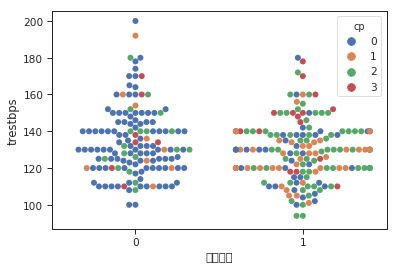

In [16]:
sns.swarmplot(x='target',y='trestbps',hue='cp',data=data, size=6)
plt.xlabel('是否患病')
plt.show()

Text(0.5, 1.0, '胸痛类型')

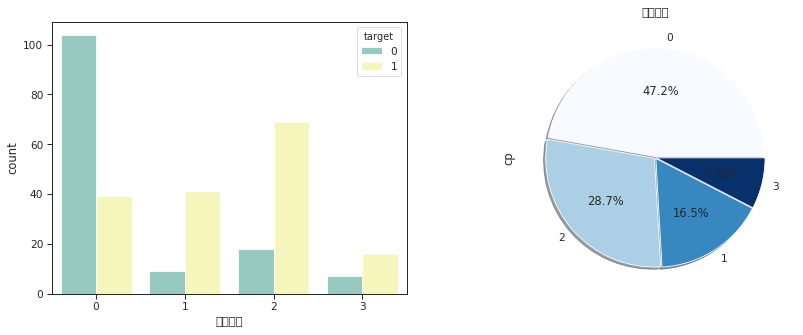

In [17]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("胸痛类型")
data.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Blues')
ax[1].set_title("胸痛类型")

备注：cp: 经历过的胸痛类型（值1：典型心绞痛，值2：非典型性心绞痛，值3：非心绞痛，值0：无症状）
从上图可以看到的是无症状，没有心绞痛的人在非患病群体中占大多数，而在患病群体中，典型心绞痛、非典型心绞痛、非心绞痛得人占了大部分。

## 大血管数量和血压、患病关系

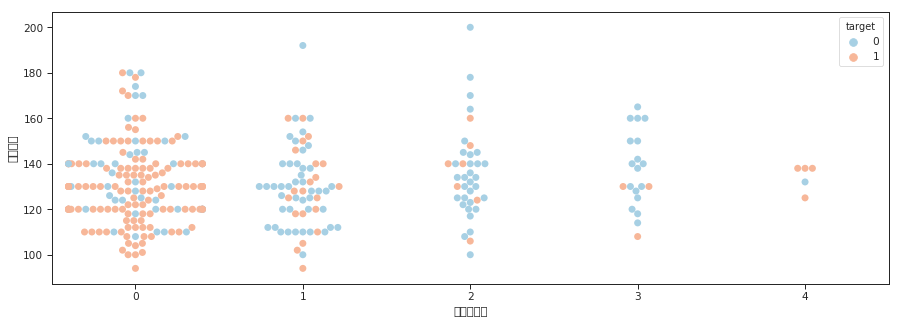

In [18]:
plt.figure(figsize=(15,5))
sns.swarmplot(y='trestbps',data=data,x='ca',hue='target',palette='RdBu_r',size=7)
plt.xlabel('大血管数量')
plt.ylabel('静息血压')
plt.show()

Text(30.689142960000012, 0.5, '年龄')

<Figure size 1080x360 with 0 Axes>

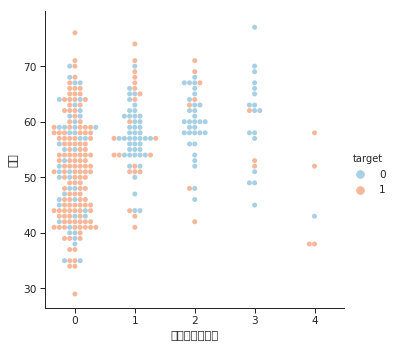

In [19]:
plt.figure(figsize=(15,5))
sns.catplot(x="ca", y="age", hue="target", kind="swarm", data=data, palette='RdBu_r')
plt.xlabel('大血管显色数量')
plt.ylabel('年龄')

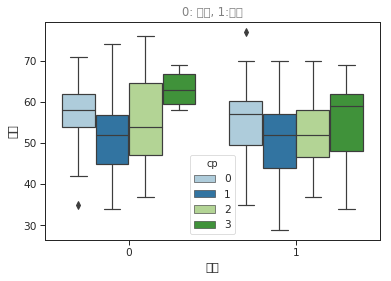

In [20]:
sns.boxplot(x="sex", y="age", hue="cp", data=data, palette="Paired")
plt.title("0: 女性, 1:男性",color="gray")
plt.legend
plt.ylabel('年龄')
plt.xlabel('性别')
plt.show()

我个人对这个萤光显色的主要血管数目（0-3）概念不是很明白，所以图就放这吧。分析初步结论是：这个显色血管数超过1个，可能没有患病；

## 相关性

因为参数众多，还有很多维度组合可以进行，因此现在总体观察一下相关性

(14.5, -0.5)

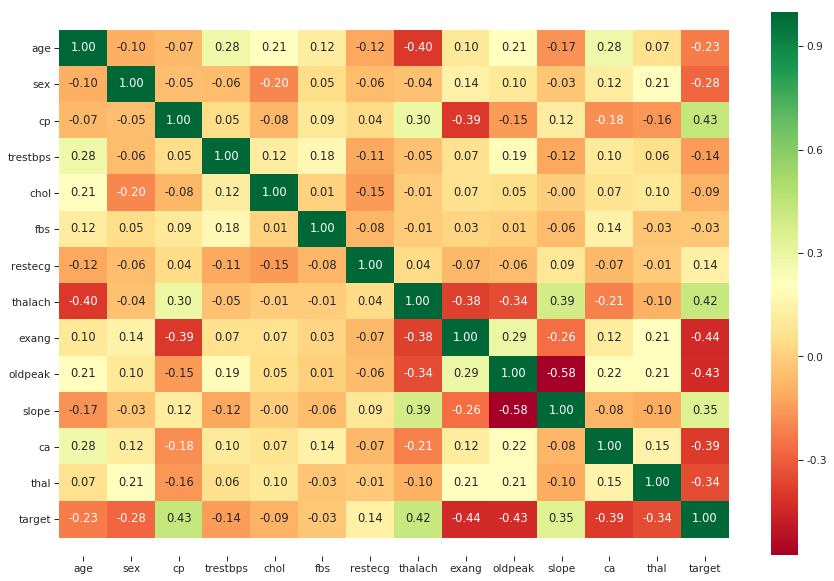

In [21]:
plt.figure(figsize=(15,10))
ax= sns.heatmap(data.corr(),cmap=plt.cm.RdYlGn , annot=True ,fmt='.2f')
a,b =ax.get_ylim()
ax.set_ylim(a+0.5,b-0.5)

颜色越深相关性越强，可以看到CP、thalach、slope相关性最强，restecg次之

今天就分析到这里